Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil


In [2]:
rostos = "/content/"
rostos_lista = [f for f in listdir(rostos) if isfile(join(rostos, f))]


In [3]:
rostos_treino = "imagens/treino/"
rostos_teste = "imagens/teste/"

if not path.exists(rostos_treino):
    makedirs(rostos_treino)

if not path.exists(rostos_teste):
    makedirs(rostos_teste)

for arq in rostos_lista:
    pessoa = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(rostos + arq, rostos_treino + arq)
    else:
        shutil.copyfile(rostos + arq, rostos_teste + arq)


In [4]:
def padr_img(imgcaminho):
    img = cv2.imread(imgcaminho, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return img

In [5]:
lista_faces_treino = [f for f in listdir(rostos_treino) if isfile(join(rostos_treino, f))]
lista_faces_teste = [f for f in listdir(rostos_teste) if isfile(join(rostos_teste, f))]

In [6]:
dad_treinamento, pessoas = [], []

In [7]:
for i, arq in enumerate(lista_faces_treino):
    img_p = rostos_treino + arq
    img = padr_img(img_p)
    dad_treinamento.append(img)
    pessoa = arq[1:3]
    pessoas.append(int(pessoa))

In [8]:
dad_teste, pessoas_teste = [], [] 

In [9]:
for i, arq in enumerate(lista_faces_teste):
    img_p = rostos_teste + arq
    img = padr_img(img_p)
    dad_teste.append(img)
    pessoa = arq[1:3]
    pessoas_teste.append(int(pessoa))

In [13]:
import numpy as np
pessoas = np.asarray(pessoas, dtype=np.int32)
pessoas_teste = np.asarray(pessoas_teste, dtype=np.int32)

In [14]:
meingenfaces = cv2.face.EigenFaceRecognizer_create()

In [15]:
meingenfaces.train(dad_treinamento, pessoas)

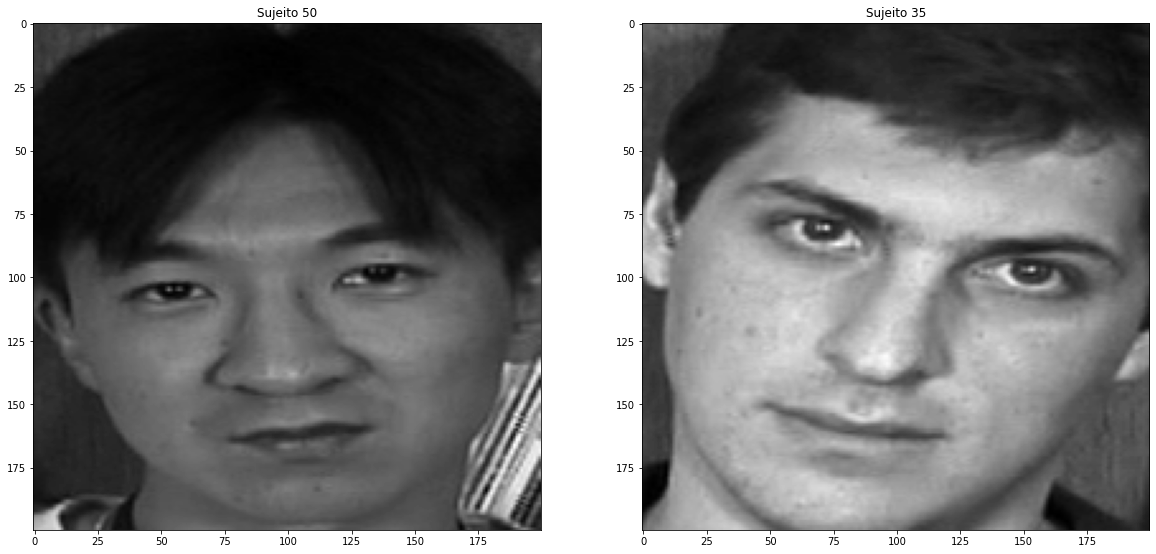

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Pessoa " + str(pessoas_teste[6]))
plt.imshow(dad_teste[6], cmap="gray")

plt.subplot(122)
plt.title("Pessoa " + str(pessoas_teste[7]))
plt.imshow(dad_teste[7], cmap="gray")

plt.show()

In [17]:
pred = meingenfaces.predict(dad_teste[6])
pred

(50, 4292.155295810652)

In [18]:
pred = meingenfaces.predict(dad_teste[7])
pred

(35, 5703.563098987583)